In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Ankuc\OneDrive\Desktop\Titanic\Data\Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

C:\Users\Ankuc\AppData\Local\Temp\ipykernel_4940\3090928046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y ='Age', palette = 'coolwarm', legend = False)


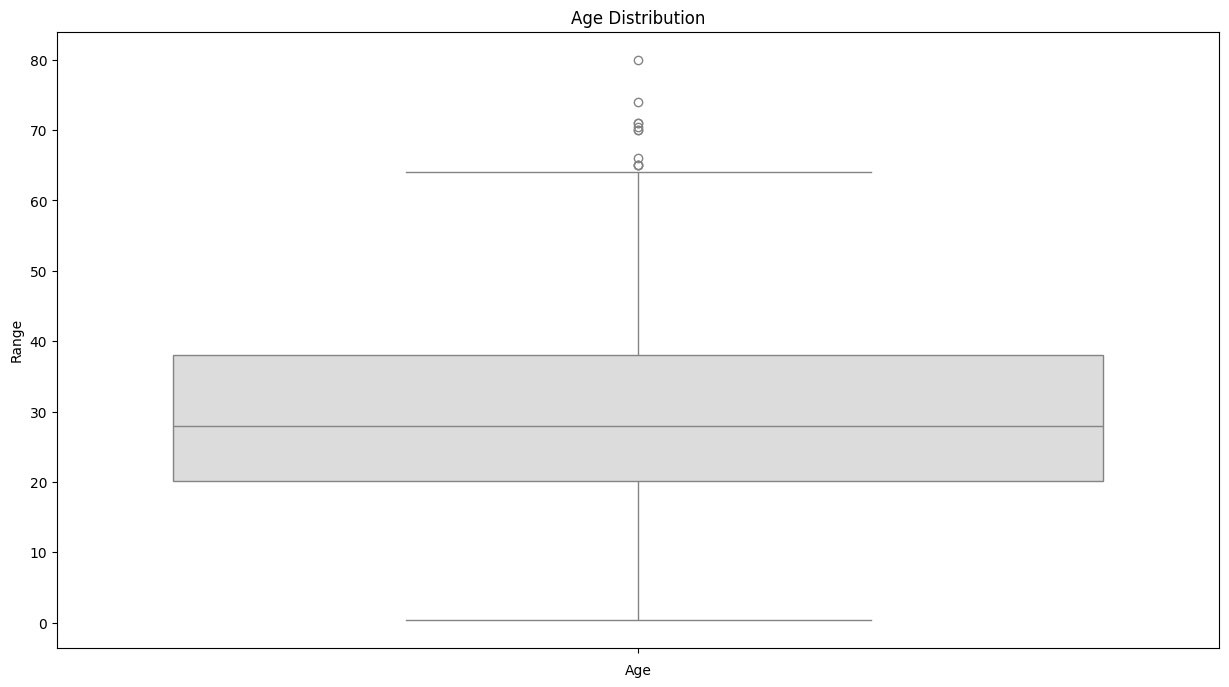

In [8]:
plt.figure(figsize=(15,8))

sns.boxplot(data = df, y ='Age', palette = 'coolwarm', legend = False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Range')
plt.show()

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Embarked'] = df['Embarked'].fillna(method='ffill')

C:\Users\Ankuc\AppData\Local\Temp\ipykernel_4940\545707175.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'] = df['Embarked'].fillna(method='ffill')


In [11]:
df1 = df.drop(columns = 'Cabin')

In [12]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [13]:
df1['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [14]:
def title(row):
    return row.split(', ')[1].split('.')[0]

df1['Title'] = df1['Name'].apply(title)

In [15]:
# Group rare titles
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Col': 'Rare', 'Major': 'Rare', 'Dr': 'Rare',
    'Rev': 'Rare', 'Jonkheer': 'Rare', 'Don': 'Rare',
    'Sir': 'Rare', 'Lady': 'Rare', 'Countess': 'Rare',
    'Capt': 'Rare', 'Dona': 'Rare'
}
df1['Title'] = df1['Title'].replace(title_mapping)

In [16]:
age_median = df1.groupby(['Title','Pclass'])['Age'].median().reset_index()
df1 = df1.merge(age_median, on=['Title', 'Pclass'], suffixes = ('', '_median'))

#df1.columns
df1['Age'] = df['Age'].fillna(df1['Age_median'])
df1 = df1.drop('Age_median', axis = 1)


In [17]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [18]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [19]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
df1['IsAlone'] = (df1['FamilySize'] == 1).astype(int)
def Groupage(x):
    if x < 12:
        return 'Child'
    elif x <= 45:
        return 'Adult'
    else:
        return 'Senior'
df1['AgeGroup'] = df1['Age'].apply(Groupage)
df1['FarePerPerson'] = df1['Fare'] / df1['FamilySize'].replace(0,1)


In [20]:
df1['AgeGroup'].unique()

array(['Adult', 'Senior', 'Child'], dtype=object)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Embarked       891 non-null    object 
 11  Title          891 non-null    object 
 12  FamilySize     891 non-null    int64  
 13  IsAlone        891 non-null    int64  
 14  AgeGroup       891 non-null    object 
 15  FarePerPerson  891 non-null    float64
dtypes: float64(3), int64(7), object(6)
memory usage: 111.5+ KB


In [22]:
df1['Ticket'].duplicated().sum()

np.int64(210)

In [23]:
df1['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [24]:
df1['FareGroup'] = pd.qcut(df1['FarePerPerson'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

In [25]:
df2 = df1.drop(columns=['PassengerId', 'Name', 'Ticket'], axis = 1)

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [27]:
le = ['Embarked', 'AgeGroup','Title', 'FareGroup']

for i in le:
    encoder = LabelEncoder()
    df2[f'{i}_le'] = encoder.fit_transform(df2[i])
    df2 = df2.drop(columns = i, axis = 1)

In [28]:
oh = ['Sex']
onehot = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore', drop='first')
df2['Gender_oh'] = onehot.fit_transform(df2[oh])

In [29]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'IsAlone', 'FarePerPerson', 'Embarked_le', 'AgeGroup_le',
       'Title_le', 'FareGroup_le', 'Gender_oh'],
      dtype='object')

In [30]:
df2 = df2.drop(columns='Sex', axis = 1)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   FamilySize     891 non-null    int64  
 7   IsAlone        891 non-null    int64  
 8   FarePerPerson  891 non-null    float64
 9   Embarked_le    891 non-null    int64  
 10  AgeGroup_le    891 non-null    int64  
 11  Title_le       891 non-null    int64  
 12  FareGroup_le   891 non-null    int64  
 13  Gender_oh      891 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 97.6 KB


In [32]:
scaler = StandardScaler()
df2[['Fare', 'Age', 'FamilySize']] = scaler.fit_transform(df2[['Fare', 'Age', 'FamilySize']])

In [33]:
df2['FamilySize'].describe()

count    8.910000e+02
mean    -2.392400e-17
std      1.000562e+00
min     -5.609748e-01
25%     -5.609748e-01
50%     -5.609748e-01
75%      5.915988e-02
max      5.640372e+00
Name: FamilySize, dtype: float64

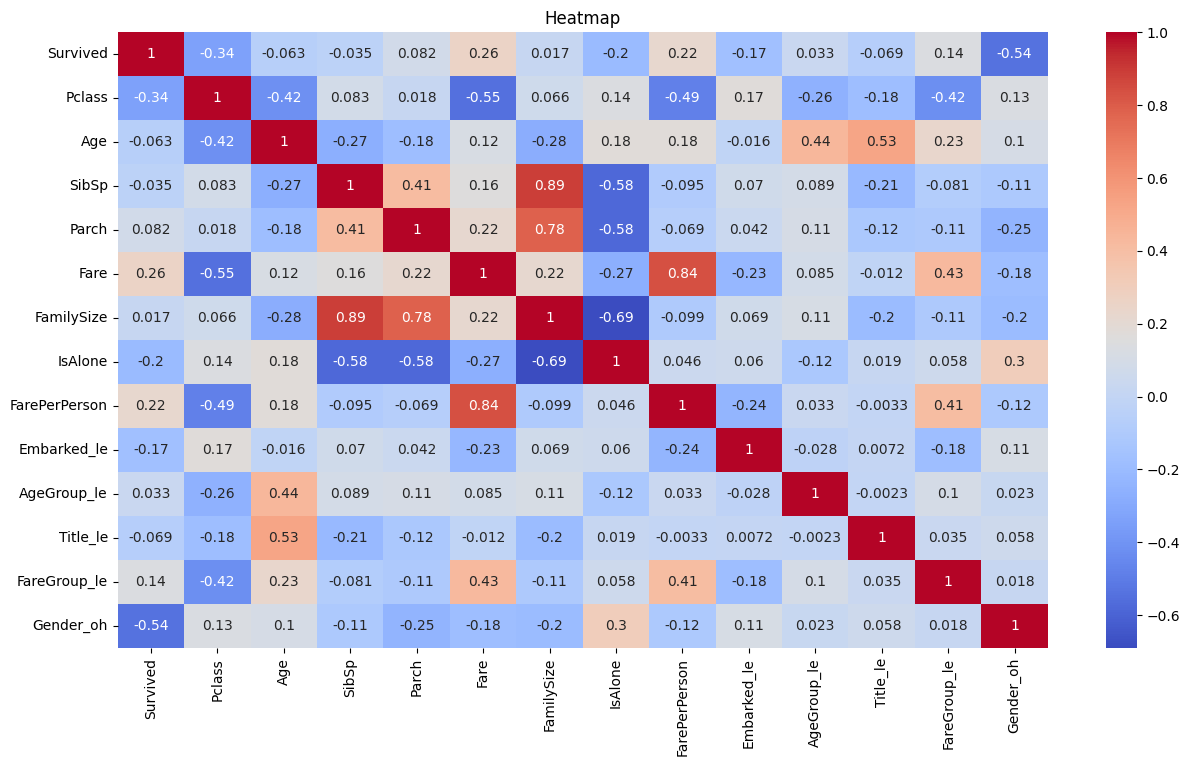

In [34]:
plt.figure(figsize=(15,8))
data = df2.corr()
sns.heatmap(data, annot = True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [35]:
target_corr = df2.corr()['Survived'].sort_values(ascending=False)
print("Correlation with Survived:")
print(target_corr)

Correlation with Survived:
Survived         1.000000
Fare             0.257307
FarePerPerson    0.221600
FareGroup_le     0.135735
Parch            0.081629
AgeGroup_le      0.032808
FamilySize       0.016639
SibSp           -0.035322
Age             -0.062785
Title_le        -0.069046
Embarked_le     -0.172726
IsAlone         -0.203367
Pclass          -0.338481
Gender_oh       -0.543351
Name: Survived, dtype: float64


In [37]:
df2.to_csv('transformed_df.csv', index = False)